In [133]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('../Data Train.csv')


In [134]:
dataset.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [135]:
dataset.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

### Mengengcode kolom churn, international plan, dan voice mail plan

In [136]:
dataset['churn'] = dataset['churn'].map({'yes':1, 'no':0})
dataset['international_plan'] = dataset['international_plan'].map({'yes':1, 'no':0})
dataset['voice_mail_plan'] = dataset['voice_mail_plan'].map({'yes':1, 'no':0})

In [137]:
dataset.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [138]:
dataset.drop(columns=['state', 'area_code'], inplace=True)

### Alasan mengdrop kolom state dan area code

Karena korelasi antara kolom lainnya tidak ada dan tidak penting

In [139]:
dataset.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [140]:
dataset2 = pd.read_csv('../Data Test.csv', index_col='id')

dataset2.drop(columns=['area_code','state'], inplace=True)

In [141]:
dataset2['international_plan'] = dataset2['international_plan'].map({'yes':1, 'no':0})
dataset2['voice_mail_plan'] = dataset2['voice_mail_plan'].map({'yes':1, 'no':0})

In [142]:
dataset2.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
id,,,,,,,,,,,,,,,,,
1,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
2,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
3,62,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
4,93,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
5,174,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [143]:
dataset.describe(), dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   international_plan             4250 non-null   int64  
 2   voice_mail_plan                4250 non-null   int64  
 3   number_vmail_messages          4250 non-null   int64  
 4   total_day_minutes              4250 non-null   float64
 5   total_day_calls                4250 non-null   int64  
 6   total_day_charge               4250 non-null   float64
 7   total_eve_minutes              4250 non-null   float64
 8   total_eve_calls                4250 non-null   int64  
 9   total_eve_charge               4250 non-null   float64
 10  total_night_minutes            4250 non-null   float64
 11  total_night_calls              4250 non-null   int64  
 12  total_night_charge             4250 non-null   f

(       account_length  international_plan  voice_mail_plan  \
 count     4250.000000         4250.000000      4250.000000   
 mean       100.236235            0.093176         0.261647   
 std         39.698401            0.290714         0.439583   
 min          1.000000            0.000000         0.000000   
 25%         73.000000            0.000000         0.000000   
 50%        100.000000            0.000000         0.000000   
 75%        127.000000            0.000000         1.000000   
 max        243.000000            1.000000         1.000000   
 
        number_vmail_messages  total_day_minutes  total_day_calls  \
 count            4250.000000        4250.000000      4250.000000   
 mean                7.631765         180.259600        99.907294   
 std                13.439882          54.012373        19.850817   
 min                 0.000000           0.000000         0.000000   
 25%                 0.000000         143.325000        87.000000   
 50%             

In [144]:
dataset2.describe(), dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 1 to 750
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 750 non-null    int64  
 1   international_plan             750 non-null    int64  
 2   voice_mail_plan                750 non-null    int64  
 3   number_vmail_messages          750 non-null    int64  
 4   total_day_minutes              750 non-null    float64
 5   total_day_calls                750 non-null    int64  
 6   total_day_charge               750 non-null    float64
 7   total_eve_minutes              750 non-null    float64
 8   total_eve_calls                750 non-null    int64  
 9   total_eve_charge               750 non-null    float64
 10  total_night_minutes            750 non-null    float64
 11  total_night_calls              750 non-null    int64  
 12  total_night_charge             750 non-null    flo

(       account_length  international_plan  voice_mail_plan  \
 count      750.000000          750.000000       750.000000   
 mean       100.385333            0.102667         0.281333   
 std         39.699029            0.303726         0.449950   
 min          1.000000            0.000000         0.000000   
 25%         74.000000            0.000000         0.000000   
 50%        101.000000            0.000000         0.000000   
 75%        126.000000            0.000000         1.000000   
 max        238.000000            1.000000         1.000000   
 
        number_vmail_messages  total_day_minutes  total_day_calls  \
 count             750.000000         750.000000       750.000000   
 mean                8.454667         180.454933       100.721333   
 std                14.123712          53.258337        19.718539   
 min                 0.000000          12.500000        39.000000   
 25%                 0.000000         146.625000        88.000000   
 50%             

In [145]:
corr = dataset.corr()

print(corr)

                               account_length  international_plan  \
account_length                       1.000000            0.027050   
international_plan                   0.027050            1.000000   
voice_mail_plan                      0.001663            0.000714   
number_vmail_messages               -0.006626            0.004808   
total_day_minutes                   -0.001612            0.040059   
total_day_calls                      0.023002            0.009776   
total_day_charge                    -0.001613            0.040061   
total_eve_minutes                   -0.010326            0.023484   
total_eve_calls                      0.005535           -0.003004   
total_eve_charge                    -0.010322            0.023479   
total_night_minutes                 -0.009916           -0.020694   
total_night_calls                   -0.001846            0.007153   
total_night_charge                  -0.009942           -0.020694   
total_intl_minutes                

In [146]:
from scipy.stats import chi2_contingency

# create a contingency table of the dataframe
contingency_table = pd.crosstab(dataset['total_day_minutes'], dataset['churn'])

# calculate the chi_squared statistic and p-value 
chi2, p, dof, expected = chi2_contingency(contingency_table)

# print the results
print(f'Chi-squared statistic: {round(chi2, 4)}', f'p-value: {p}')

Chi-squared statistic: 2433.2074 p-value: 3.686388256688278e-19


<Axes: >

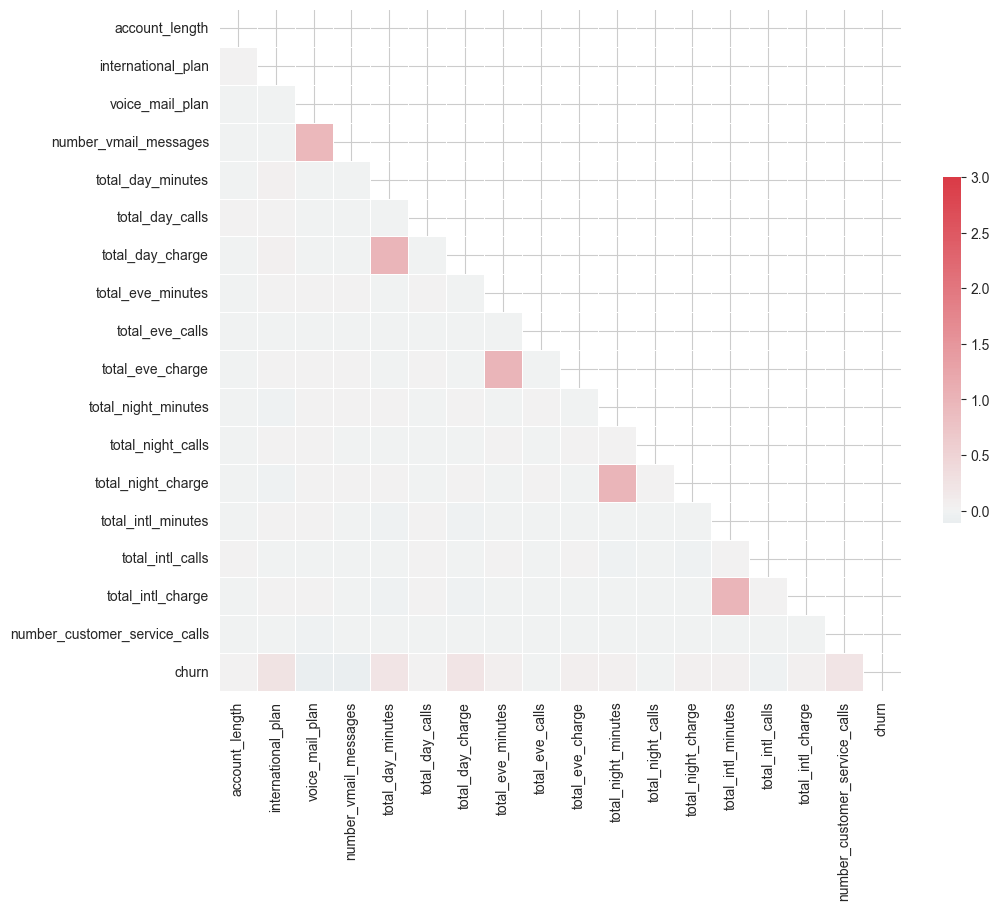

In [147]:
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

# generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=np.bool_))

# set up the matplotlib figure 
f, ax = plt.subplots(figsize=(11, 9))

# generate a custome diverging colormap 
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=3, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})

# Using random forest classification

F1 Score: 0.8636363636363635
Accuracy Score: 0.9647058823529412
Recall Score: 0.7916666666666666


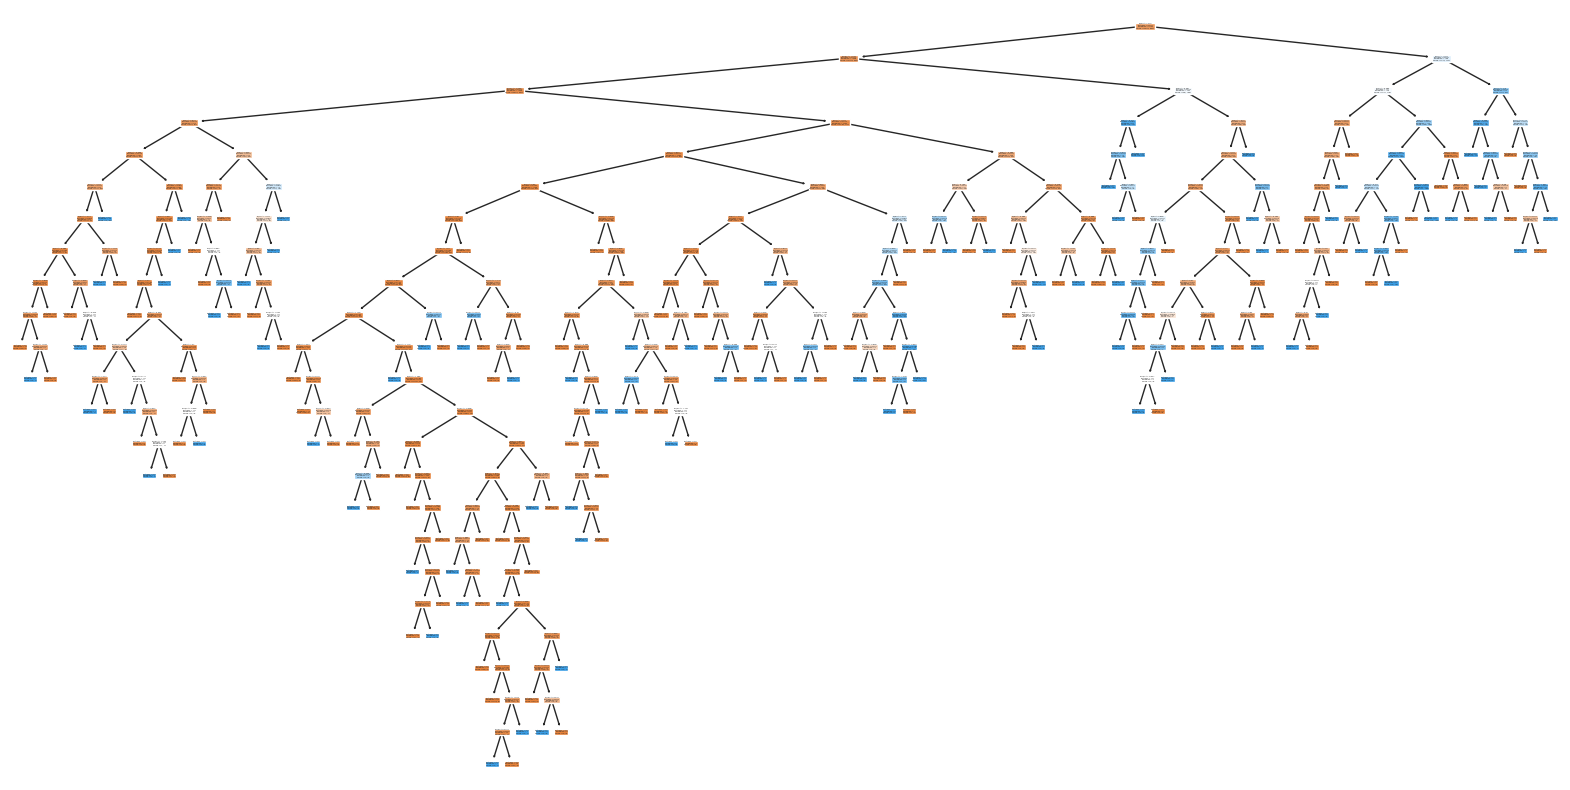

In [148]:
# %% [markdown]
'''
### Random Forest Classification
'''
# %%
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
# %%

# %%
X = dataset.drop(['churn'],axis=1)
y = dataset['churn']
# %%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=997)
# %%
ss = StandardScaler()
scalled_x_train = ss.fit_transform(X_train)
scalled_x_test = ss.transform(X_test)
# %%
classifier_rfc = RandomForestClassifier(
    n_estimators=45, criterion='entropy', n_jobs=-1).fit(scalled_x_train, y_train)
# %%
y_pred = classifier_rfc.predict(scalled_x_test)
# %%
cm = confusion_matrix(y_test, y_pred)
# %%
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f'Recall Score: {recall_score(y_test, y_pred)}')

from sklearn.tree import plot_tree

# plot the first tree from the random forest
plt.figure(figsize=(20,10))
plot_tree(classifier_rfc.estimators_[0], filled=True)
plt.show()

In [149]:
prediction = classifier_rfc.predict(dataset2).astype(bool)

C:\Users\mario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


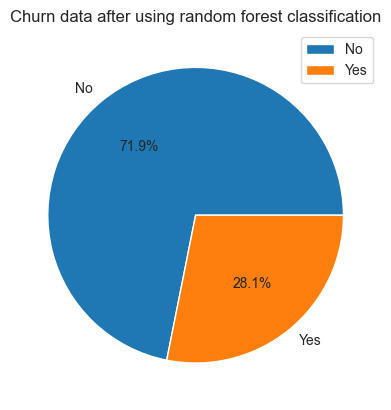

In [150]:
import matplotlib.pyplot as plt
%matplotlib inline 

data = pd.Series(prediction)
churn_data = data.map({True:'Yes', False:'No'})
# count the number of yes and no values in the churn columns
plt.pie(churn_data.value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.legend(labels=['No', 'Yes'])
plt.title('Churn data after using random forest classification')
plt.show()

In [151]:
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[725   5]
 [ 25  95]]


In [152]:
from sklearn.metrics import classification_report

X = dataset.drop(['churn'],axis=1)
y = dataset['churn']
# %%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=997)
# %%
ss = StandardScaler()
scalled_x_train = ss.fit_transform(X_train)
scalled_x_test = ss.transform(X_test)
# %%
classifier_rfc = RandomForestClassifier(
    n_estimators=45, criterion='entropy', n_jobs=-1).fit(scalled_x_train, y_train)
# %%
y_pred = classifier_rfc.predict(scalled_x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       730
           1       0.95      0.78      0.85       120

    accuracy                           0.96       850
   macro avg       0.96      0.88      0.92       850
weighted avg       0.96      0.96      0.96       850



In [153]:
feature_scores = pd.Series(classifier_rfc.feature_importances_, index=X_train.columns).sort_values(ascending = False) 
feature_scores

total_day_charge                 0.137765
total_day_minutes                0.134285
number_customer_service_calls    0.116233
international_plan               0.081542
total_eve_charge                 0.063933
total_eve_minutes                0.062446
total_intl_calls                 0.047647
total_intl_minutes               0.045474
total_intl_charge                0.045190
total_night_minutes              0.044389
total_night_charge               0.041158
account_length                   0.040218
total_eve_calls                  0.031027
total_day_calls                  0.030665
total_night_calls                0.030120
number_vmail_messages            0.026750
voice_mail_plan                  0.021159
dtype: float64

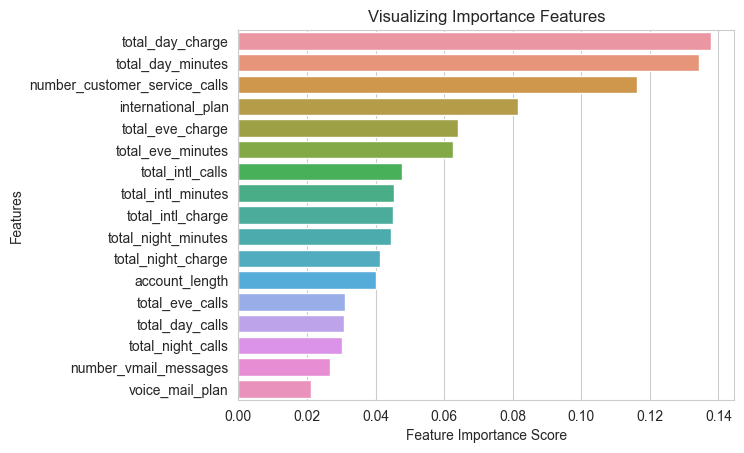

In [154]:
import seaborn as sns  

sns.barplot(x=feature_scores, y=feature_scores.index)


# add labels to the graph 
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph  
plt.title('Visualizing Importance Features')

plt.show()

Visualisasi features importance scores dapat membantu untuk memahami panjang lebar bahwa setiap fitur memberikan kontribusi terhadap hasil prediksi model

# Using Decision Tree Clasification

F1 Score: 0.749003984063745
Accuracy Score: 0.9258823529411765
Recall Score: 0.7833333333333333


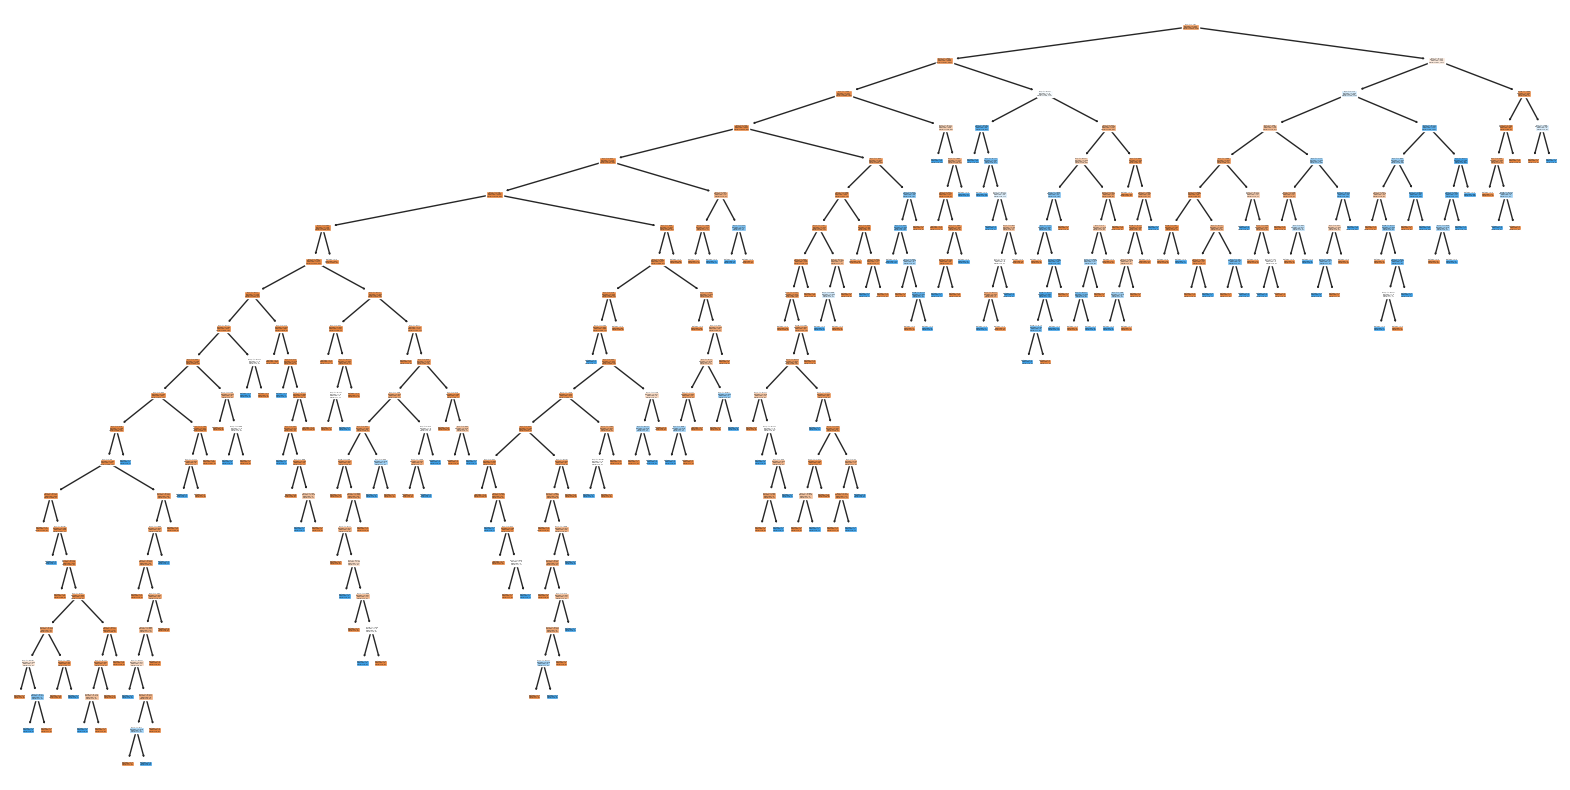

In [155]:
# %% [markdown]
'''
Decision Tree Classification
'''
# %%
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
# %%

# %%
X = dataset.drop(['churn'], axis=1)
y = dataset['churn']
# %%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=997)
# %%
ss = StandardScaler()
scalled_x_train = ss.fit_transform(X_train)
scalled_x_test = ss.transform(X_test)

# %%
classifier_dt = DecisionTreeClassifier(
    random_state=997, criterion='entropy').fit(scalled_x_train, y_train)
# %%
y_pred = classifier_dt.predict(scalled_x_test)
# %%
cm = confusion_matrix(y_test, y_pred)
# %%
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f'Recall Score: {recall_score(y_test, y_pred)}')

from sklearn.tree import plot_tree
# plot the first tree from the random forest
plt.figure(figsize=(20,10))
plot_tree(classifier_dt, filled=True)
plt.show()

In [156]:
prediction_dt = classifier_dt.predict(dataset2).astype(bool)

C:\Users\mario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


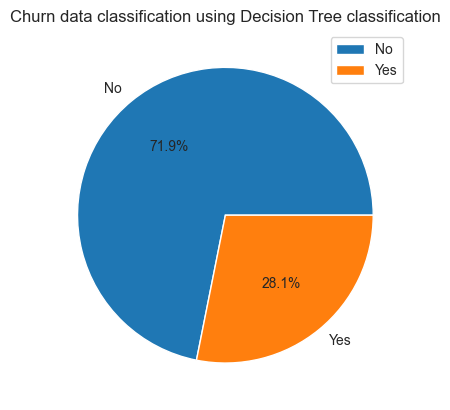

In [157]:
pd_data = pd.Series(prediction_dt)
churn_data_dt = pd_data.map({True:'Yes', False:'No'})

plt.pie(churn_data.value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.legend(labels=['No', 'Yes'])
plt.title('Churn data classification using Decision Tree classification')
plt.show()

In [158]:
print('Confusion Matrix\n\n', cm)

Confusion Matrix

 [[693  37]
 [ 26  94]]


In [159]:
X = dataset.drop(['churn'], axis=1)
y = dataset['churn']
# %%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=997)
# %%
ss = StandardScaler()
scalled_x_train = ss.fit_transform(X_train)
scalled_x_test = ss.transform(X_test)

# %%
classifier_dt = DecisionTreeClassifier(
    random_state=997, criterion='entropy').fit(scalled_x_train, y_train)
# %%
y_pred = classifier_dt.predict(scalled_x_test)
# %%
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       730
           1       0.72      0.78      0.75       120

    accuracy                           0.93       850
   macro avg       0.84      0.87      0.85       850
weighted avg       0.93      0.93      0.93       850



In [160]:
feature_scores1 = pd.Series(classifier_dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores1

total_day_charge                 0.128369
total_day_minutes                0.119520
number_customer_service_calls    0.113521
international_plan               0.096775
total_eve_minutes                0.088884
total_intl_charge                0.079914
total_intl_calls                 0.060562
total_eve_charge                 0.052374
number_vmail_messages            0.041988
total_night_minutes              0.041397
account_length                   0.039851
total_night_charge               0.038547
total_intl_minutes               0.030695
total_night_calls                0.025271
total_day_calls                  0.024077
total_eve_calls                  0.018257
voice_mail_plan                  0.000000
dtype: float64

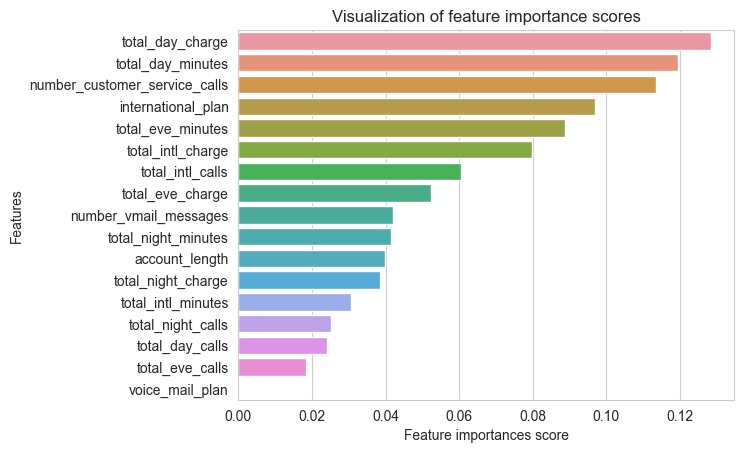

In [161]:
sns.barplot(x=feature_scores1, y=feature_scores1.index)

plt.xlabel('Feature importances score')
plt.ylabel('Features')
plt.title('Visualization of feature importance scores')
plt.show()

# Using LogisticRegression 

In [162]:
data_train = pd.read_csv('../Data Train.csv')
data_train.drop(columns=['area_code','state'], inplace=True)

In [163]:
data_train.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [164]:
data_train['churn'] = data_train['churn'].map({'no':0, 'yes':1})
data_train['international_plan'] = data_train['international_plan'].map({'no':0, 'yes':1})
data_train['voice_mail_plan'] = data_train['voice_mail_plan'].map({'no':0, 'yes':1})

In [165]:
data_train.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [166]:
# %% [markdown]
'''
### Logistic Regression
'''
# %%
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    confusion_matrix,
    auc,
    roc_curve,
)
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# %%
# %%

# %%
X = data_train.drop(['churn'], axis=1)
y = data_train['churn']
# %%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=997, test_size=0.2
)
# %%
# Better scale all features
sc_x = StandardScaler()
scalled_x_train = sc_x.fit_transform(X_train)
# Do All required transformations as they are data specific
# %%
classifier = LogisticRegression(random_state=997).fit(scalled_x_train, y_train)
# %%
scalled_x_test = sc_x.transform(X_test)
y_pred = classifier.predict(scalled_x_test)
# %%
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc(fpr, tpr)
# %%
print(f'Confusion Matrix:{confusion_matrix(y_test, y_pred)}')
print(f'F1 Score:{f1_score(y_test, y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f'Recall Score: {recall_score(y_test, y_pred)}')

Confusion Matrix:[[707  23]
 [ 94  26]]
F1 Score:0.3076923076923077
Accuracy Score: 0.8623529411764705
Recall Score: 0.21666666666666667


In [167]:
scalled_data_train = sc_x.transform(dataset2)
prediction = classifier.predict(scalled_data_train)

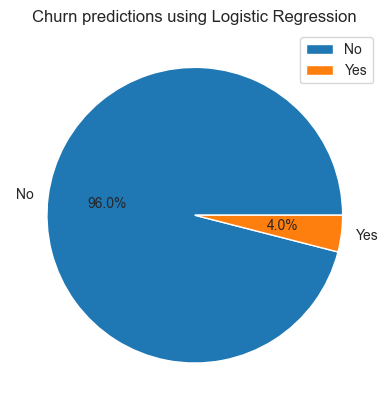

In [168]:
data_pred = pd.Series(prediction)

result = data_pred.map({0:'No', 1:'Yes'})

plt.pie(result.value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.legend(labels=['No', 'Yes'])
plt.title('Churn predictions using Logistic Regression')
plt.show()

In [169]:
X = data_train.drop(['churn'], axis=1)
y = data_train['churn']
# %%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=997, test_size=0.2
)
# %%
# Better scale all features
sc_x = StandardScaler()
scalled_x_train = sc_x.fit_transform(X_train)
# Do All required transformations as they are data specific
# %%
classifier = LogisticRegression(random_state=997).fit(scalled_x_train, y_train)
# %%
scalled_x_test = sc_x.transform(X_test)
y_pred = classifier.predict(scalled_x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       730
           1       0.53      0.22      0.31       120

    accuracy                           0.86       850
   macro avg       0.71      0.59      0.62       850
weighted avg       0.83      0.86      0.84       850



In [170]:
coef = classifier.coef_[0]
abs_coef = np.abs(coef)
feature_importance = abs_coef / abs_coef.sum()

feature_scores_lr = pd.Series(feature_importance, index=X_train.columns).sort_values(ascending=False) 
feature_scores_lr

voice_mail_plan                  0.201679
number_customer_service_calls    0.153852
international_plan               0.139511
number_vmail_messages            0.109432
total_day_minutes                0.082650
total_day_charge                 0.080522
total_eve_minutes                0.036934
total_eve_charge                 0.036122
total_intl_calls                 0.031305
total_intl_minutes               0.029686
total_night_minutes              0.025517
total_night_charge               0.024895
total_intl_charge                0.020148
total_night_calls                0.015340
total_eve_calls                  0.005603
account_length                   0.004224
total_day_calls                  0.002582
dtype: float64

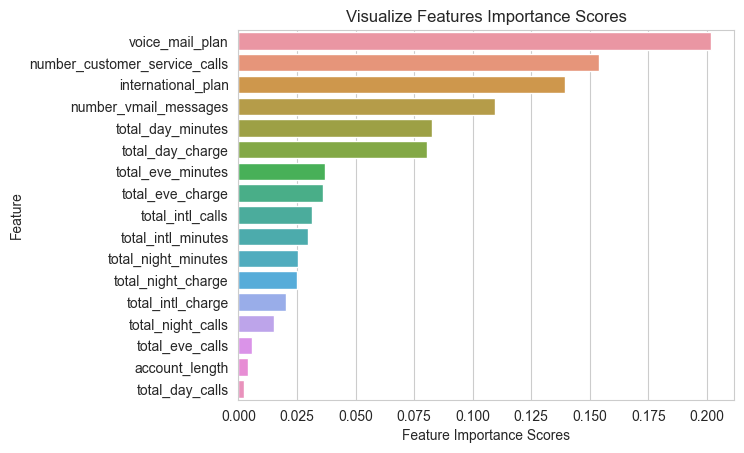

In [171]:
sns.barplot(x=feature_scores_lr, y=feature_scores_lr.index)

plt.xlabel('Feature Importance Scores')
plt.ylabel('Feature')
plt.title('Visualize Features Importance Scores')
plt.show()